## **MACHINE LEARNING MODEL**
**LOADING DATASET**

In [162]:
import numpy as np     # importing numpy for data computing
import pandas as pd    # importing pandas data processing, manipulating of data, analyzing and cleaning

In [163]:
dataset = pd.read_csv('delaney_solubility_with_descriptors.csv') #reading the file with pd.read_csv
dataset.head(8)

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04
5,1.8100,98.960,0.0,0.0,-1.29
6,1.9352,96.944,0.0,0.0,-1.64
7,1.4054,118.176,4.0,0.0,-0.43


## **PREPROCESSING OF DATA**

**CHECKING FOR NULL VALUES**

In [164]:
dataset.isna().sum()
#checking if dataset have any empty values with .isna() and using .sum() to find the total value in all coloumn

MolLogP               0
MolWt                 0
NumRotatableBonds     0
AromaticProportion    0
logS                  0
dtype: int64

**DATA SEPARATION AS X AND Y**

In [165]:
y = dataset['logS']      
#choosing logS as target variable and rest of the columns as training set

y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [166]:
x = dataset.drop('logS', axis= 1)     
#axis= 1 is used so that the column gets affected

x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


**DATA SPLITTING**

In [167]:
from sklearn.model_selection import train_test_split
#used for preproessing, cross-validation, visualization algorithm

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 100)
#splitting data into x_train/test and y_train/test i.e. x/y_train contains 80% of data while x/y_test contains 20% of the data

In [168]:
x_train 

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [169]:
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


# **MODEL BUILDING**

## **LINEAR REGRESSION**

In [170]:
from sklearn.linear_model import LinearRegression

#creating a linear regression model instance
lr = LinearRegression()
#training the model on (x_train and y_train)
lr.fit(x_train, y_train)

LinearRegression()

**APPLYING THE MODEL TO MAKE A PREDICTION**

In [171]:
#predicting the target values for the training dataset using the trained Linear Regression model
y_lr_train_pred = lr.predict(x_train)

#predicting the target values for the testing dataset using the trained Linear Regression model
y_lr_test_pred = lr.predict(x_test)

**EVALUATE MODEL PERFORMANCE**


*ACTUAL VALUE*

In [172]:
# 'y_train' contains the actual target values (ground truth) for the training dataset.
# It is used to evaluate the model's predictions and measure its performance during training.

y_train

107   -4.440
378   -1.250
529   -1.655
546   -1.886
320   -0.740
       ...  
802   -2.925
53    -2.680
350   -7.020
79    -4.800
792   -3.240
Name: logS, Length: 915, dtype: float64

*PREDECTED VALUE*

In [173]:
# 'y_lr_train_pred' contains the predicted target values for the training dataset.
# These predictions are generated by the trained Linear Regression model and will be
# compared against 'y_train' to evaluate the model's performance on the training data.

y_lr_train_pred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

In [174]:
from sklearn.metrics import mean_squared_error, r2_score

#calculating the Mean Squared Error (MSE) for the training dataset predictions
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
#calculating the R² score for the training dataset predictions
lr_train_r2 = r2_score(y_train, y_lr_train_pred)


#calculating the Mean Squared Error (MSE) for the testing dataset predictions
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
#calculating the R² score for the testing dataset predictions
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [175]:
#printing the evaluation metrics for the Linear Regression Model on the training and test data

print("LR MSE (TRAIN) :", lr_train_mse)
print("LR R2 (TRAIN) :", lr_train_r2)
print("LR MSE (TEST) :", lr_test_mse)
print("LR R2 (TEST) :", lr_test_r2)

LR MSE (TRAIN) : 1.0075362951093687
LR R2 (TRAIN) : 0.7645051774663391
LR MSE (TEST) : 1.0206953660861033
LR R2 (TEST) : 0.7891616188563282


# *DATA VISUALIZATION FOR LINER REGRESSION MODEL*

[]

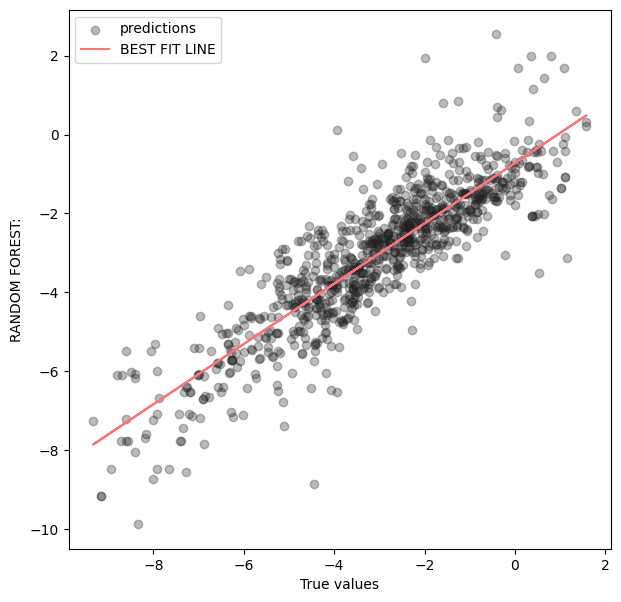

In [176]:
import matplotlib.pyplot as plt

#Set up the figure size for the plot
plt.figure(figsize=(7,7))
#creating a scatter plot of true target values vs predicted values
plt.scatter(x= y_train, y= y_lr_train_pred, c= "#202020", alpha= 0.3, label= 'predictions') #data points

#Fitting a trend line using np.polyfit
z= np.polyfit(y_train, y_lr_train_pred, 1) #calculate the coefficients for the best fit line
p= np.poly1d(z)  #creating a polynomial function from the coefficients
plt.plot(y_train, p(y_train), color='#F8766D', label='BEST FIT LINE') #ploting the trend line

#labeling the axes
plt.xlabel('True values')
plt.ylabel('RANDOM FOREST:')
#adding a legend to distinguish the data points and the trend line
plt.legend()

#displaying the plot
plt.plot()

# *CREATING A TABLE FOR ALL THE MODELS BUILD*

In [177]:
#creating a DataFrame to store Linear Regression results
lr_result = pd.DataFrame(
    ['LINEAR REGRESSION', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2] #adding results to the list
).transpose() #transpose the dataframe to align rows and columns properly
#assign column names to the dataframe
lr_result.columns = ['METHOD', 'TRAINING MSE', 'TRAINING R2', 'TEST MSE', 'TEST R2']

#displaying the dataframe contanning the linear regression results
lr_result

,METHOD,TRAINING MSE,TRAINING R2,TEST MSE,TEST R2
0,LINEAR REGRESSION,1.007536,0.764505,1.020695,0.789162


## **RANDOM FOREST**

In [178]:
from sklearn.ensemble import RandomForestRegressor

#initialize a Random Forest Regressor with a maximum tree depth of 2 and a fixed random seed for reproducibility
rf = RandomForestRegressor(max_depth= 2, random_state=100)
#training the Random Forest model on the training dataset (x_train: features, y_train: target variable)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [179]:
#predicting the target values for the training dataset using the trained Random Forest model
y_rf_train_pred = rf.predict(x_train)

#predicting the target values for the testing dataset using the trained Random Forest model
y_rf_test_pred = rf.predict(x_test)

In [180]:
from sklearn.metrics import mean_squared_error, r2_score

#calculating the Mean Squared Error (MSE) for the training dataset predictions
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
#calculating the R² score for the training dataset predictions
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

#calculating the Mean Squared Error (MSE) for the testing dataset predictions
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
#calculating the R² score for the testing dataset predictions
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [181]:
#printing the evaluation metrics for the Random Forest Model on the training and test data

print("RF TRAIN MSE :", rf_train_mse )
print("RF TRAIN R2 :", rf_train_r2 )
print("RF TEST MSE :", rf_test_mse )
print("RF TEST R2 :", rf_test_r2 )

RF TRAIN MSE : 1.028227802112806
RF TRAIN R2 : 0.7596688824431413
RF TEST MSE : 1.407688264904896
RF TEST R2 : 0.7092230211002489


# *DATA VISUALIZATION FOR RANDOM FOREST*

[]

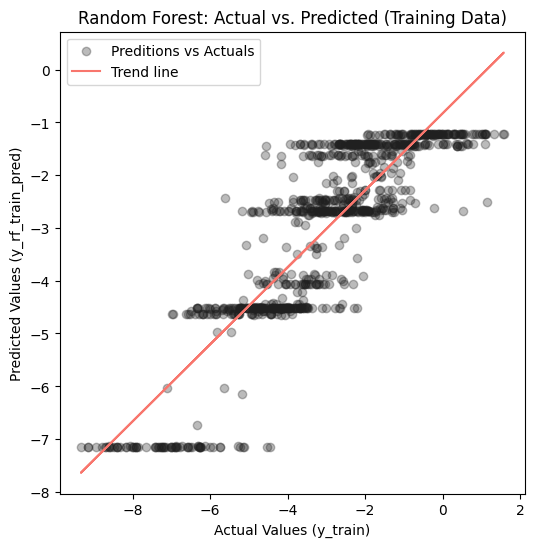

In [182]:
import matplotlib.pyplot as plt

#creating the scatter plot to visualize actual vs predicted values
plt.figure(figsize=(6,6)) #set figure size
plt.scatter(x= y_train, y= y_rf_train_pred, c= "#202020", alpha= 0.3, label= "Preditions vs Actuals") #scatter plot for data points

#fitting a trend line using np.polyfit
z= np.polyfit(y_train, y_rf_train_pred, 1) #fit a linear trend line
p= np.poly1d(z) #creating a polynomial function from the coefficients
plt.plot(y_train, p(y_train), color='#F8766D', label= "Trend line") #plotting thee trend line

#adding plot labels, title and legend
plt.xlabel("Actual Values (y_train)") #label for x-axis
plt.ylabel("Predicted Values (y_rf_train_pred)") #label for y-axia
plt.title("Random Forest: Actual vs. Predicted (Training Data)") #plot title
plt.legend() #displaying legend

#displaing the plot
plt.plot()

In [183]:
#creating a dataframe to store random forest results
rf_result = pd.DataFrame(
    ['RANDOM FOREST', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2] #adding random forest result to a list
).transpose() #transpose the dataframe for correct alignment
#assign appropriate column names to dataframe
rf_result.columns = ['METHOD', 'TRAINING MSE', 'TRAINING R2', 'TEST MSE', 'TEST R2']

#concatanate the linear regression and random forest results into a single dataframe
df_models = pd.concat([lr_result, rf_result], axis=0, ignore_index = True)
df_models

,METHOD,TRAINING MSE,TRAINING R2,TEST MSE,TEST R2
0,LINEAR REGRESSION,1.007536,0.764505,1.020695,0.789162
1,RANDOM FOREST,1.028228,0.759669,1.407688,0.709223


## **DECISION TREE**

In [184]:
from sklearn.tree import DecisionTreeRegressor

#initialize the decision tree regressor with a maximum depth of 2 and a fixed random state
dtc = DecisionTreeRegressor(max_depth= 2, random_state=100)
#training the Decision Tree Regressor on the training data (x_train and y_train)
dtc.fit(x_train, y_train)


DecisionTreeRegressor(max_depth=2, random_state=100)

In [185]:
#generating predictions for the training data using the trained Decision Tree model
y_dtc_train_pred = dtc.predict(x_train)
#generating predictions for the test data using the trained Decision Tree model
y_dtc_test_pred = dtc.predict(x_test)

In [186]:
from sklearn.metrics import mean_squared_error, r2_score

#calculating the Mean Squared Error (MSE) for the training data predictions
dtc_train_mse = mean_squared_error(y_train, y_dtc_train_pred)
#calculating the R-squared (R2) score for the training data predictions
dtc_train_r2 = r2_score(y_train, y_dtc_train_pred)

#calculating the Mean Squared Error (MSE) for the test data predictions
dtc_test_mse = mean_squared_error(y_test, y_dtc_test_pred)
#calculating the R-squared (R2) score for the test data predictions
dtc_test_r2 = r2_score(y_test, y_dtc_test_pred)

In [187]:
#printing the evaluation metrics for the Decision Tree model on the training and test data

print("DTC TRAIN MSE :", dtc_train_mse )
print("DTC TRAIN R2 :", dtc_train_r2 )
print("DTC TEST MSE :", dtc_test_mse )
print("DTC TEST R2 :", dtc_test_r2 )

DTC TRAIN MSE : 1.1695152592338907
DTC TRAIN R2 : 0.7266452933154164
DTC TEST MSE : 1.6276677486441418
DTC TEST R2 : 0.6637832946378377


In [188]:
#creating a dataframe to store decision tree results
dtc_result = pd.DataFrame(
    ['DECISION TREE', dtc_train_mse, dtc_train_r2, dtc_test_mse, dtc_test_r2] #adding decision tree results to a list
).transpose() #transpose the daataframe for correct alignment
#assign appropriate column names to the Decision Tree DataFrame
dtc_result.columns = ['METHOD', 'TRAINING MSE', 'TRAINING R2', 'TEST MSE', 'TEST R2']

#concatenate the Linear Regression, Random Forest, and Decision Tree results into a single DataFrame
df_models = pd.concat([lr_result, rf_result, dtc_result], axis=0, ignore_index = True)
df_models


,METHOD,TRAINING MSE,TRAINING R2,TEST MSE,TEST R2
0,LINEAR REGRESSION,1.007536,0.764505,1.020695,0.789162
1,RANDOM FOREST,1.028228,0.759669,1.407688,0.709223
2,DECISION TREE,1.169515,0.726645,1.627668,0.663783
